In [2]:
import Magics.macro as magics
import xarray as xr

/usr/local/apps/python3/3.6.8-01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
ds = xr.open_dataset('/home/graphics/cgs/netcdf-data/impact1.nc')

Select just one time and smaller area and write it as netcdf...

In [51]:
one_timestamp = ds.sel(leadtime = '2018-10-30T02:00:00',x=slice(3800000,5000000),y=slice(3200000,2000000))
#one_timestamp.impact.plot()

In [59]:
one_timestamp.to_netcdf('one_timestamp1.nc')

In [60]:
one = xr.open_dataset('one_timestamp1.nc')
one

<xarray.Dataset>
Dimensions:                       (projection: 1, x: 1200, y: 1200)
Coordinates:
  * x                             (x) float64 3.800e+06 3.802e+06 ... 5e+06
  * y                             (y) float64 3.2e+06 3.198e+06 ... 2.000e+06
  * projection                    (projection) int64 0
    leadtime                      datetime64[ns] ...
Data variables:
    lambert_azimuthal_equal_area  (projection) float64 ...
    impact                        (y, x) float32 ...
Attributes:
    datatype:      Flashflood Domain 1km
    Conventions:   CF-1.7
    projection:    proj=laea lat_0=52 lon_0=10 x_0=4321000 y_0=3210000 ellps=...
    grid_corners:  [ 27.77518389  -8.24912343  66.5057622  -34.07578344  57.8...

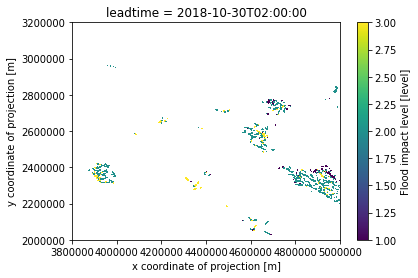

In [61]:
one.impact.plot()

In [3]:
projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_lower_left_latitude    = 30.,
    subpage_lower_left_longitude   = -10.,
    subpage_map_projection         = 'cylindrical',
    subpage_upper_right_latitude   = 70,
    subpage_upper_right_longitude  = 30.,
    page_id_line                   = "off"
    
) 

light_background = magics.mcoast(map_coastline_sea_shade_colour= 'white',
                     map_coastline_land_shade_colour= 'cream',
                     map_grid= 'off',
                     map_coastline_land_shade= 'on',
                     map_coastline_sea_shade= 'on',
                     map_label= 'off',
                     map_coastline_colour= 'tan')

black_background = magics.mcoast(
    map_coastline_sea_shade         =   "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

legend = magics.mlegend(
    legend_display_type   = "continuous",
    legend_box_mode       = "automatic",
    legend_box_y_position = 17.00,
    legend_box_x_length   = 32.0,
    legend_box_y_length   = 1.50,
    legend_text_colour    = "charcoal",
    legend_text_font_size = "0.4")

In [25]:
my_cont = magics.mcont(
  contour_shade                = "on",
  contour_shade_technique      = "grid_shading",
  contour_level_selection_type = 'level_list',
  contour_level_list           = [1.,2,3,4,5],
  contour_shade_colour_method  = "list",
  contour_shade_colour_list    = ['#ffffe0', '#a5d5d8', '#73a2c6', '#4771b2', '#00429d'],
  legend                       = 'on'
)

Combinations I have tried:
- netcdf_dimension_setting_method = 'index', netcdf_dimension_setting         = ["leadtime:1"]
- netcdf_time_dimension_setting   = 'leadtime:4'
- netcdf_dimension_setting        = ["leadtime:1"]
- netcdf_time_dimension_setting   = ['leadtime:2018-10-30T10:00:00'],
- netcdf_dimension_setting    = ['leadtime:2018-10-30T10:00:00'],

Some of them just result in the error, on some the kernel dies.  
I'm out of ideas...

I've also tried all *netcdf_type*s, didn't go far...

In [26]:
data = magics.mnetcdf(    
    netcdf_filename                  = 'one_timestamp1.nc',
    netcdf_type                      = "complex_matrix",
    netcdf_latitude_variable         = "y",
    netcdf_longitude_variable        = "x",
#    netcdf_dimension_setting_method  = 'index',
#    netcdf_dimension_setting         = ["leadtime:1"],
#    netcdf_time_dimension_setting    = ['leadtime:2018-10-30T10:00:00'],
    netcdf_value_variable            = "impact"
    )

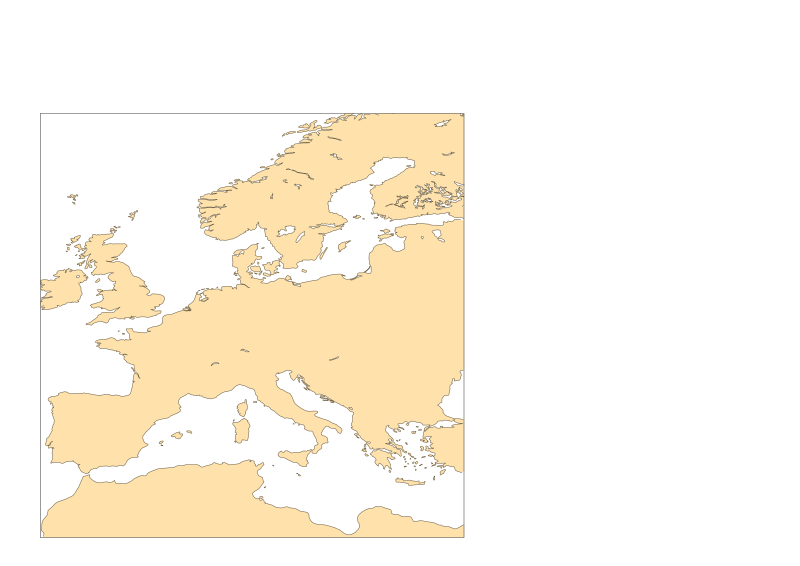

In [27]:
magics.plot(projection,light_background,data,my_cont)